In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# LOading loans dataframe
loans = pd.read_csv("loan.csv", encoding = "ISO-8859-1", low_memory=False)

In [3]:
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
# Checking loan shape
loans.shape

(39717, 111)

In [5]:
# Checking total no. of null values column wise
loans.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [6]:
# Dropping all columns which are empty or has all the values as null
loans=loans.dropna(axis=1, how="all")
loans.shape

(39717, 57)

In [7]:
loans.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [8]:
# Checking the unique values column wise
loans.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

In [9]:
# Dropping columns which has same value throughout or has only one value
loans = loans.loc[:, loans.nunique()!=1]
loans.shape

(39717, 48)

In [10]:
loans.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   2459
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
url                            0
desc                       12940
purpose                        0
title                         11
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq     25682
mths_since_last_record     36931
open_acc                       0
pub_rec   

In [11]:
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


In [12]:
# for analysis purpose, description why borrowe needs loan is not required, better to drop the column
loans = loans.drop('desc',axis=1)
loans.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   2459
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
url                            0
purpose                        0
title                         11
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq     25682
mths_since_last_record     36931
open_acc                       0
pub_rec                        0
revol_bal 

In [13]:
# Dropping columns mths_since_last_delinq, mths_since_last_record and next_pymnt_d as they have high number of missing values
loans= loans.drop(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d'], axis=1)
loans.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                  2459
emp_length                 1075
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
url                           0
purpose                       0
title                        11
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
out_prnc

In [14]:
# Dropping title, emp_length, emp_title as it won't be used in our analysis
loans= loans.drop(['emp_title', 'title'], axis=1)
loans.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                 1075
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
url                           0
purpose                       0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_py

In [15]:
round(100*(loans.isnull().sum()/len(loans.id)), 2)

id                         0.00
member_id                  0.00
loan_amnt                  0.00
funded_amnt                0.00
funded_amnt_inv            0.00
term                       0.00
int_rate                   0.00
installment                0.00
grade                      0.00
sub_grade                  0.00
emp_length                 2.71
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
issue_d                    0.00
loan_status                0.00
url                        0.00
purpose                    0.00
zip_code                   0.00
addr_state                 0.00
dti                        0.00
delinq_2yrs                0.00
earliest_cr_line           0.00
inq_last_6mths             0.00
open_acc                   0.00
pub_rec                    0.00
revol_bal                  0.00
revol_util                 0.13
total_acc                  0.00
out_prncp                  0.00
out_prncp_inv              0.00
total_py

In [16]:
# Analyzing pub_rec_bankruptcies
loans['pub_rec_bankruptcies'].unique()

array([ 0.,  1.,  2., nan])

In [17]:
loans['pub_rec_bankruptcies'].value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [18]:
# It is better to drop rows where pub_rec_bankruptcies is null or empty
loans = loans[~loans['pub_rec_bankruptcies'].isnull()]
round(100*(loans.isnull().sum()/len(loans.id)), 2)

id                         0.00
member_id                  0.00
loan_amnt                  0.00
funded_amnt                0.00
funded_amnt_inv            0.00
term                       0.00
int_rate                   0.00
installment                0.00
grade                      0.00
sub_grade                  0.00
emp_length                 2.75
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
issue_d                    0.00
loan_status                0.00
url                        0.00
purpose                    0.00
zip_code                   0.00
addr_state                 0.00
dti                        0.00
delinq_2yrs                0.00
earliest_cr_line           0.00
inq_last_6mths             0.00
open_acc                   0.00
pub_rec                    0.00
revol_bal                  0.00
revol_util                 0.13
total_acc                  0.00
out_prncp                  0.00
out_prncp_inv              0.00
total_py

In [19]:
# Similarly, removing observations where revol_util and last_pymnt_d is null or empty
loans = loans[~loans['revol_util'].isnull()]
loans = loans[~loans['last_pymnt_d'].isnull()]
loans = loans[~loans['emp_length'].isnull()]
round(100*(loans.isnull().sum()/len(loans.id)), 2)

id                         0.0
member_id                  0.0
loan_amnt                  0.0
funded_amnt                0.0
funded_amnt_inv            0.0
term                       0.0
int_rate                   0.0
installment                0.0
grade                      0.0
sub_grade                  0.0
emp_length                 0.0
home_ownership             0.0
annual_inc                 0.0
verification_status        0.0
issue_d                    0.0
loan_status                0.0
url                        0.0
purpose                    0.0
zip_code                   0.0
addr_state                 0.0
dti                        0.0
delinq_2yrs                0.0
earliest_cr_line           0.0
inq_last_6mths             0.0
open_acc                   0.0
pub_rec                    0.0
revol_bal                  0.0
revol_util                 0.0
total_acc                  0.0
out_prncp                  0.0
out_prncp_inv              0.0
total_pymnt                0.0
total_py

In [20]:
loans.shape

(37836, 42)

#### In cleaning stage itself, we will convert all the columns to the required datatypes

In [21]:
loans.dtypes

id                           int64
member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
url                         object
purpose                     object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                  object
total_acc           

In [22]:
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [23]:
# Converting required field to datetime
loans['issue_d'] = pd.to_datetime(loans['issue_d'], format='%b-%y')
loans['earliest_cr_line'] = pd.to_datetime(loans['earliest_cr_line'], format='%b-%y')
loans['last_pymnt_d'] = pd.to_datetime(loans['last_pymnt_d'], format='%b-%y')
loans['last_credit_pull_d'] = pd.to_datetime(loans['last_credit_pull_d'], format='%b-%y')

In [24]:
loans[['issue_d','earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37836 entries, 0 to 39680
Data columns (total 4 columns):
issue_d               37836 non-null datetime64[ns]
earliest_cr_line      37836 non-null datetime64[ns]
last_pymnt_d          37836 non-null datetime64[ns]
last_credit_pull_d    37835 non-null datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 1.4 MB


In [25]:
# Removig the rows where loan_status is Current as we won't perform analysis on status which is going on
loans['loan_status'].value_counts()

Fully Paid     31534
Charged Off     5204
Current         1098
Name: loan_status, dtype: int64

In [26]:
loans = loans[loans['loan_status'] != 'Current']
loans.shape

(36738, 42)

# Analysis

In [27]:
# Introducing new column isDefault which indicates it the borrower is charged off
loans['isDefault'] = loans['loan_status'].map(lambda x : 1 if x=='Charged Off' else 0)
loans[['loan_status', 'isDefault']].head(20)

,loan_status,isDefault
0,Fully Paid,0
1,Charged Off,1
2,Fully Paid,0
3,Fully Paid,0
5,Fully Paid,0
6,Fully Paid,0
7,Fully Paid,0
8,Charged Off,1
9,Charged Off,1
10,Fully Paid,0


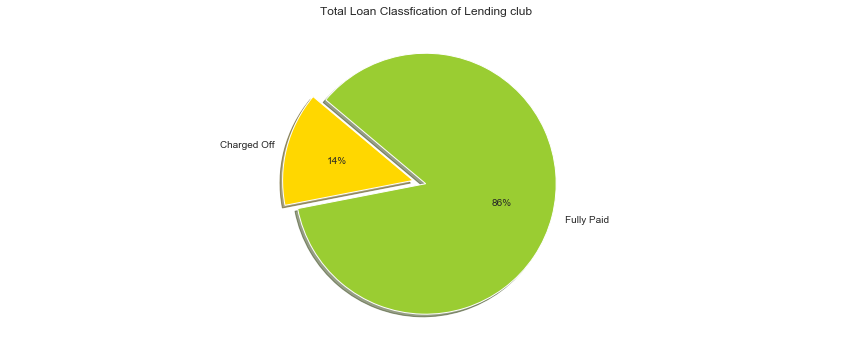

In [72]:
# Plotting loan_status
from matplotlib.pyplot import pie, axis, show
plt.figure(figsize=(15, 6))
plt.title("Total Loan Classfication of Lending club")
sums = loans.funded_amnt_inv.groupby(loans.loan_status).count()
axis('equal')
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice
pie(sums, labels=sums.index, explode = explode, colors = colors,autopct='%1.0f%%', shadow=True, startangle=140)
show()

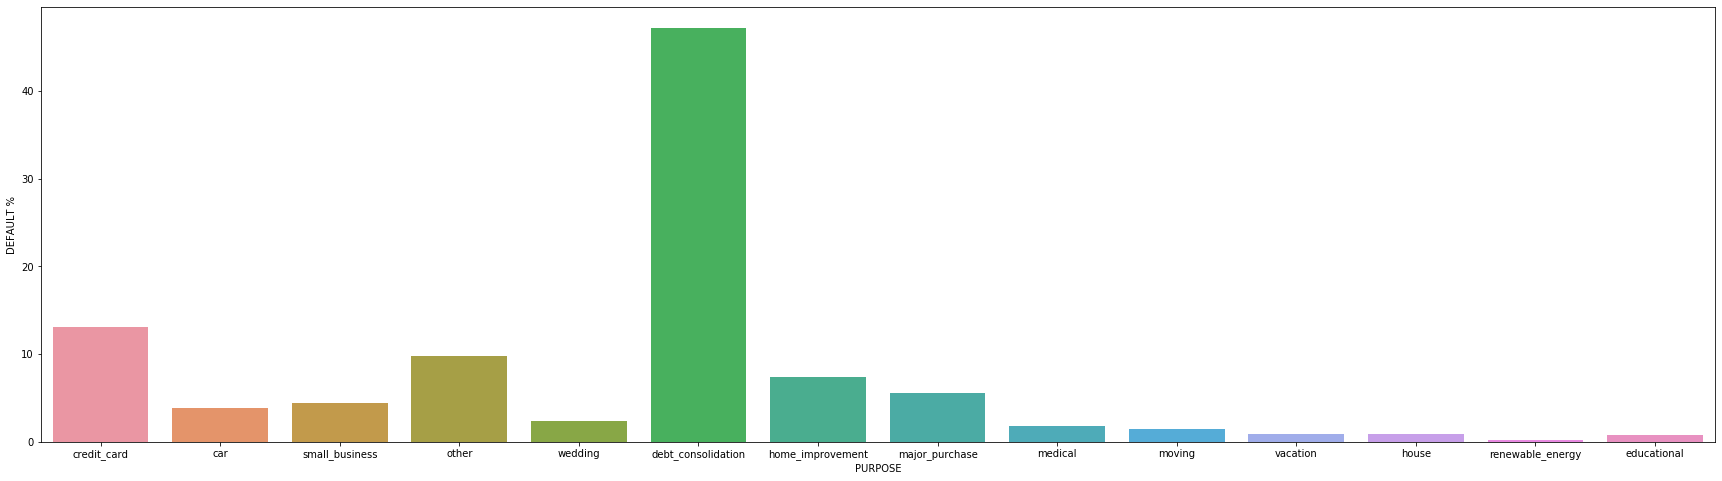

In [33]:
plt.figure(figsize=(30, 8))
ax = sns.barplot(x="purpose",y="isDefault", data=loans, estimator=lambda x:len(x)/len(loans)*100)
ax.set(xlabel='PURPOSE', ylabel='DEFAULT %')
plt.show()

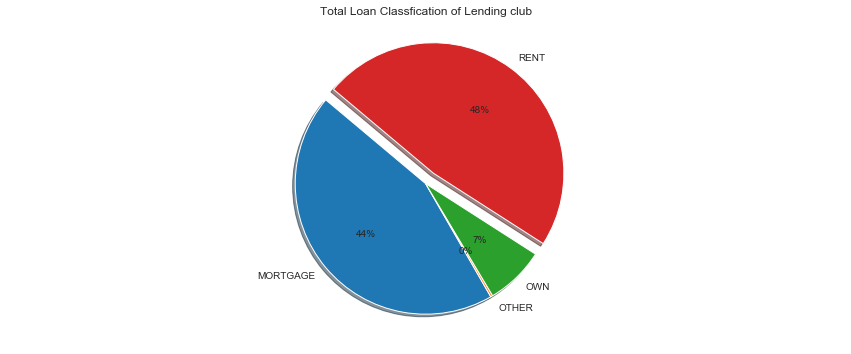

In [81]:
plt.figure(figsize=(15, 6))
plt.title("Total Loan Classfication of Lending club")
sums = loans.funded_amnt_inv.groupby(loans.home_ownership).count()
axis('equal')

explode = (0, 0,0,0.1)
pie(sums, labels=sums.index, explode = explode,autopct='%1.0f%%', shadow=True, startangle=140)
show()

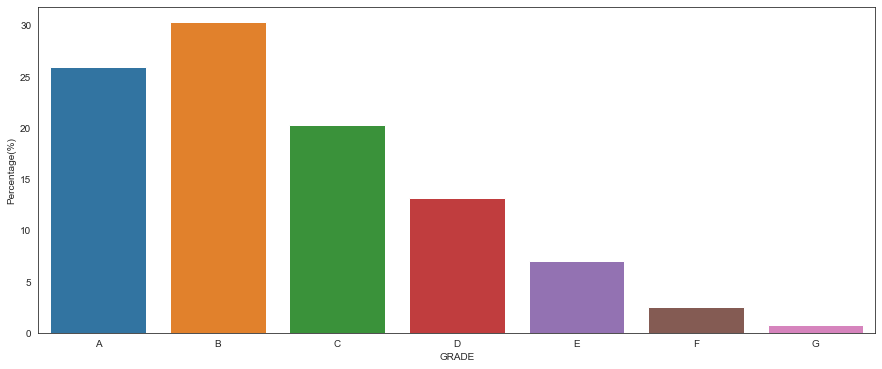

In [82]:
# TODO: SORT A-Z
plt.figure(figsize=(15, 6))
ax = sns.barplot(x="grade",y="isDefault", data=loans, estimator=lambda x:len(x)/len(loans)*100, order=sorted(loans['grade'].unique()))
ax.set(xlabel='GRADE', ylabel='Percentage(%)')
plt.show()

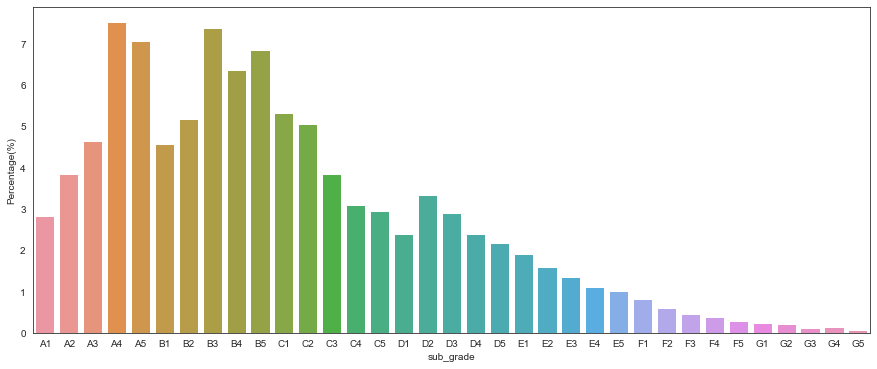

In [83]:
# TODO: Sort a-z
plt.figure(figsize=(15, 6))
ax = sns.barplot(x="sub_grade",y="isDefault", data=loans, estimator=lambda x:len(x)/len(loans)*100, order=sorted(loans['sub_grade'].unique()))
ax.set(xlabel='sub_grade', ylabel='Percentage(%)')
plt.show()

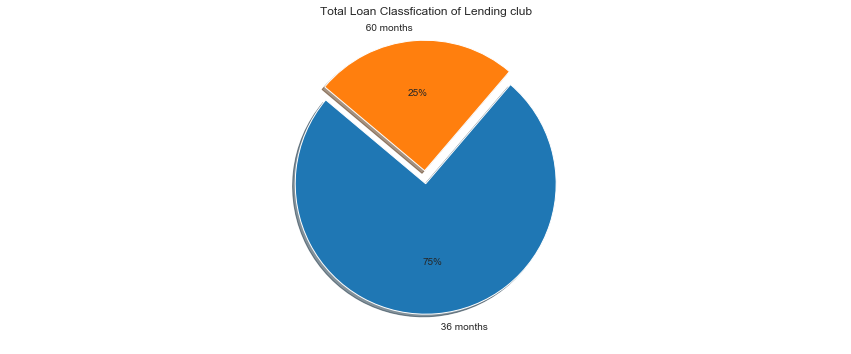

In [85]:
# TODO: Sort a-z
plt.figure(figsize=(15, 6))
plt.title("Total Loan Classfication of Lending club")
sums = loans.funded_amnt_inv.groupby(loans.term).count()
axis('equal')

explode = (0, 0.1)
pie(sums, labels=sums.index, explode = explode,autopct='%1.0f%%', shadow=True, startangle=140)
show()

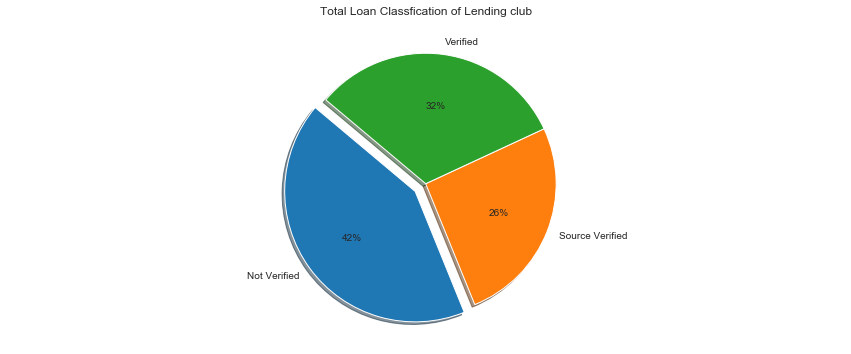

In [89]:
# TODO: verification_status
plt.figure(figsize=(15, 6))
plt.title("Total Loan Classfication of Lending club")
sums = loans.funded_amnt_inv.groupby(loans.verification_status).count()
axis('equal')

explode = (0.1, 0,0)
pie(sums, labels=sums.index, explode = explode,autopct='%1.0f%%', shadow=True, startangle=140)
show()

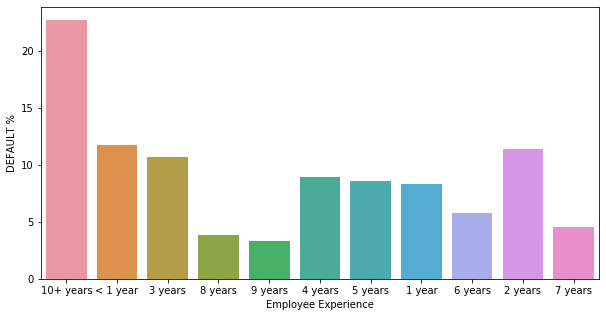

In [39]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x="emp_length",y="isDefault", data=loans, estimator=lambda x:len(x)/len(loans)*100)
ax.set(xlabel='Employee Experience', ylabel='DEFAULT %')
plt.show()

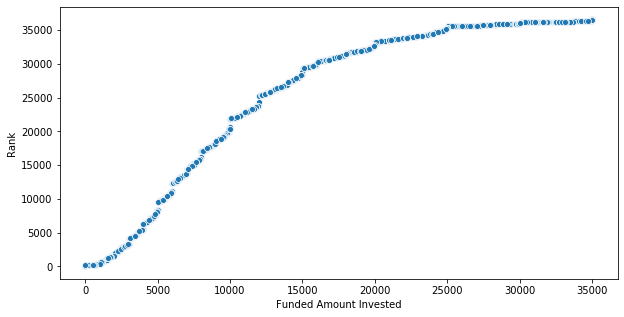

In [40]:
# NUMERICOCAL UNIVARIATE
plt.figure(figsize=(10,5))
ax = sns.scatterplot(x="funded_amnt_inv", y=loans['funded_amnt_inv'].rank(method='min'), data=loans)
ax.set(xlabel='Funded Amount Invested', ylabel='Rank')
plt.show()

In [41]:
buck = [0, 5000, 10000, 15000, 20000, 25000,40000]
lab = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000 and above']
loans['loan_amnt_range'] = pd.cut(loans['funded_amnt_inv'], buck, labels=lab)

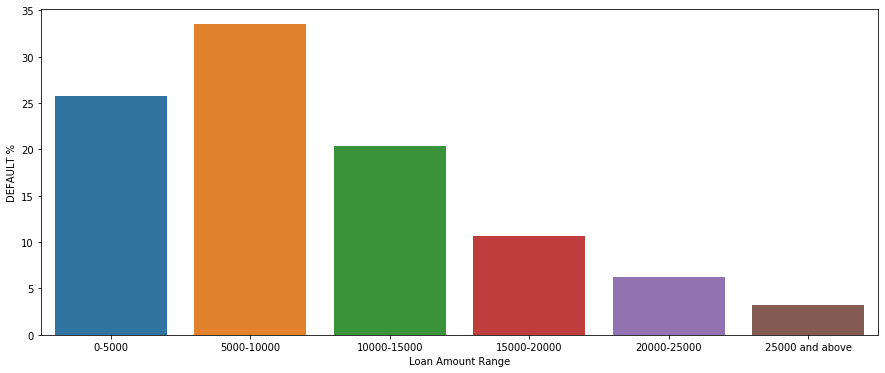

In [42]:
plt.figure(figsize=(15, 6))
ax = sns.barplot(x="loan_amnt_range",y="isDefault", data=loans, estimator=lambda x:len(x)/len(loans)*100)
ax.set(xlabel='Loan Amount Range', ylabel='DEFAULT %')
plt.show()

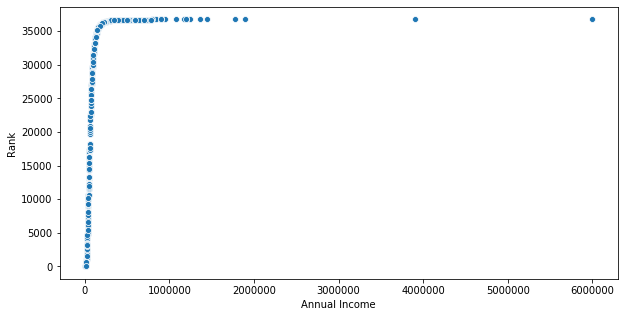

In [43]:
plt.figure(figsize=(10,5))
ax = sns.scatterplot(x="annual_inc", y=loans['annual_inc'].rank(method='min'), data=loans)
ax.set(xlabel='Annual Income', ylabel='Rank')
plt.show()

In [44]:
buck = [0, 50000, 100000, 150000, 200000, 250000]
lab = ['0-50000', '50000-100000', '100000-150000', '150000-200000', '200000 and above']
loans['annual_salary'] = pd.cut(loans['annual_inc'], buck, labels=lab)

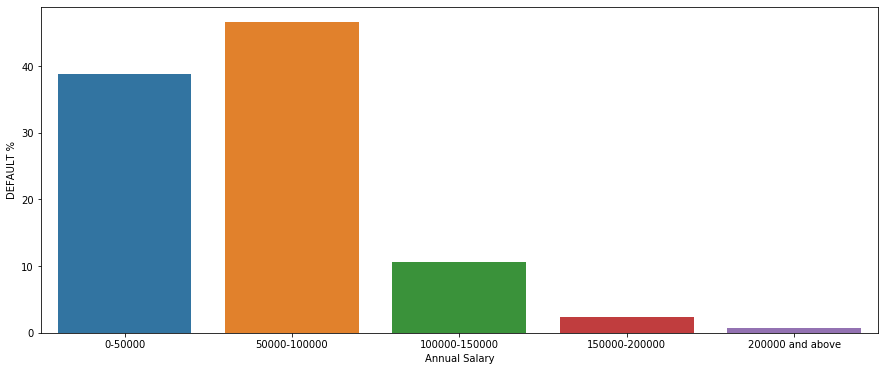

In [45]:
plt.figure(figsize=(15, 6))
ax = sns.barplot(x="annual_salary",y="isDefault", data=loans, estimator=lambda x:len(x)/len(loans)*100)
ax.set(xlabel='Annual Salary', ylabel='DEFAULT %')
plt.show()

In [46]:
loans['int_rate'] = loans['int_rate'].map(lambda x: x.split('%')[0])
loans['int_rate'] = loans['int_rate'].map(lambda x: float(x))
loans['int_rate'].head()

0    10.65
1    15.27
2    15.96
3    13.49
5     7.90
Name: int_rate, dtype: float64

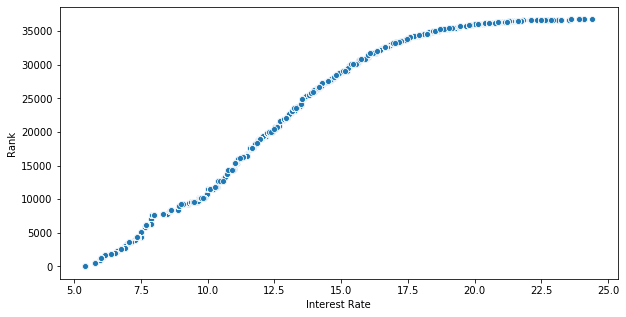

In [47]:
plt.figure(figsize=(10,5))
ax = sns.scatterplot(x="int_rate", y=loans['int_rate'].rank(method='min'), data=loans)
ax.set(xlabel='Interest Rate', ylabel='Rank')
plt.show()

In [48]:
buck = [5,7.5,10,12.5,15,17.5,20,22.5, 25]
lab = ['5-7.5','7.5-10','10-12.5','12.5-15','15-17.5','17.5-20','20-22.5','22.5 and above']
loans['rate_of_intertest'] = pd.cut(loans['int_rate'], buck, labels=lab)

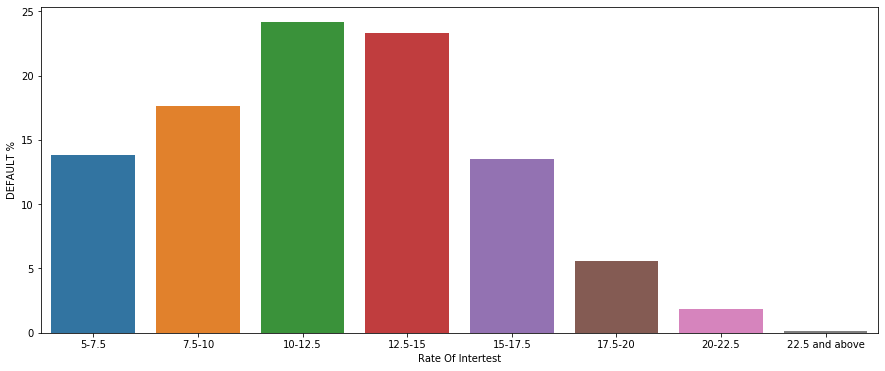

In [49]:
plt.figure(figsize=(15, 6))
ax = sns.barplot(x="rate_of_intertest",y="isDefault", data=loans, estimator=lambda x:len(x)/len(loans)*100)
ax.set(xlabel='Rate Of Intertest', ylabel='DEFAULT %')
plt.show()

In [50]:
# TODO emp_length, dti, revol_util
loans['dti'].describe()

count    36738.000000
mean        13.336656
std          6.649550
min          0.000000
25%          8.220000
50%         13.430000
75%         18.590000
max         29.990000
Name: dti, dtype: float64

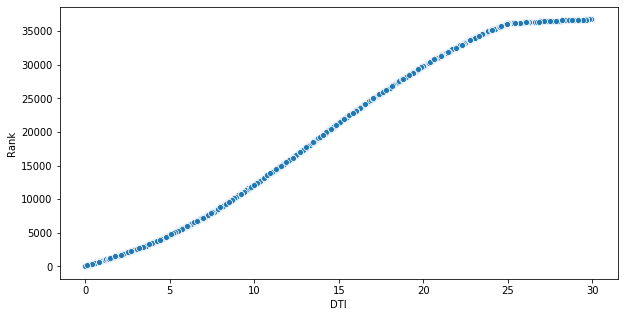

In [51]:
plt.figure(figsize=(10,5))
ax = sns.scatterplot(x="dti", y=loans['dti'].rank(method='min'), data=loans)
ax.set(xlabel='DTI', ylabel='Rank')
plt.show()

In [52]:
buck = [0,5,10,15,20,25,30]
lab = ['0-5', '5-10','10-15','15-20','20-25','25-30']
loans['dti_range'] = pd.cut(loans['dti'], buck, labels=lab)

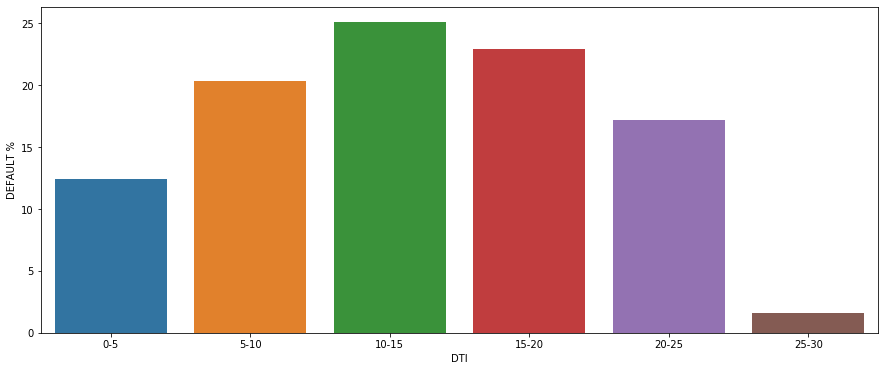

In [53]:
plt.figure(figsize=(15, 6))
ax = sns.barplot(x="dti_range",y="isDefault", data=loans, estimator=lambda x:len(x)/len(loans)*100)
ax.set(xlabel='DTI', ylabel='DEFAULT %')
plt.show()

In [54]:
loans['revol_util'].describe()

count     36738
unique     1086
top          0%
freq        881
Name: revol_util, dtype: object

In [55]:
loans['revol_util']=loans['revol_util'].str.rstrip('%').astype('float')

In [56]:
buck = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
lab = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100']
loans['revol_uti_rangle'] = pd.cut(loans['revol_util'], buck, labels=lab)

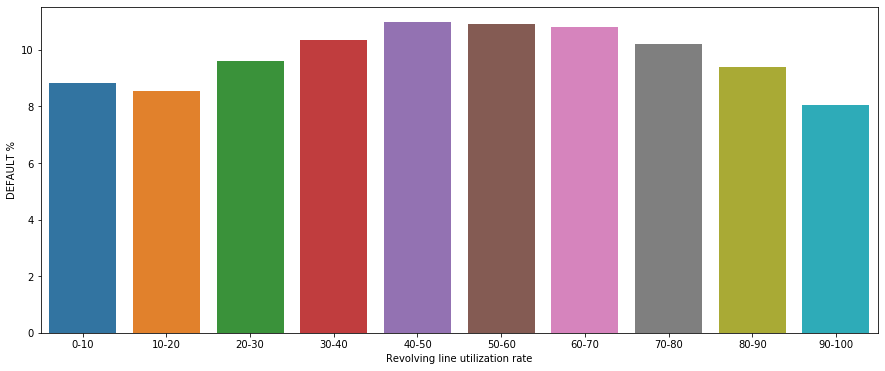

In [57]:
plt.figure(figsize=(15, 6))
ax = sns.barplot(x="revol_uti_rangle",y="isDefault", data=loans, estimator=lambda x:len(x)/len(loans)*100)
ax.set(xlabel='Revolving line utilization rate', ylabel='DEFAULT %')
plt.show()

# Bivariate Analysis

In [58]:
a = loans['funded_amnt_inv'].groupby

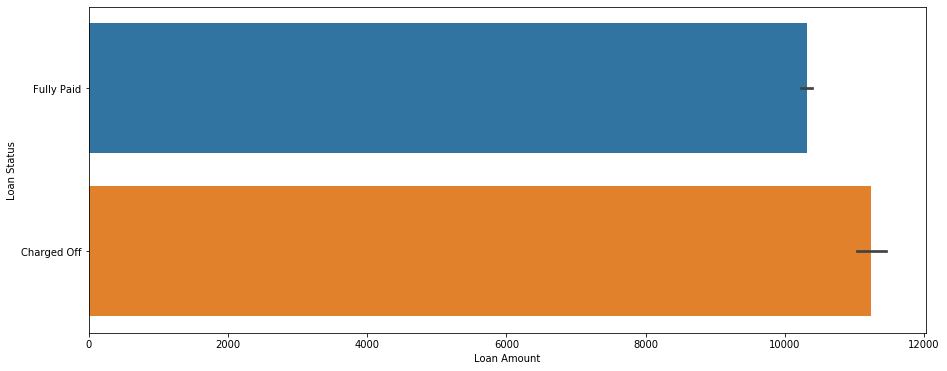

In [59]:
plt.figure(figsize=(15, 6))
ax = sns.barplot(x="funded_amnt_inv",y="loan_status", data=loans)
ax.set(xlabel='Loan Amount', ylabel='Loan Status')
plt.show()

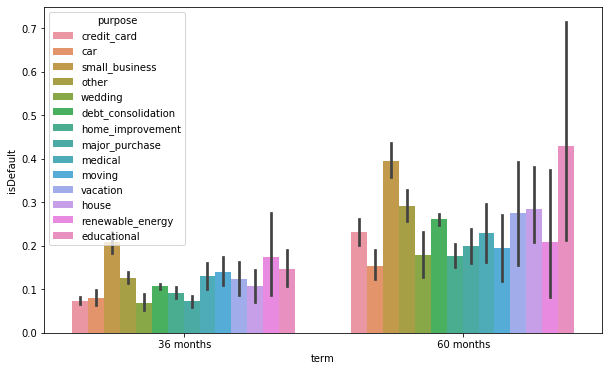

In [60]:
plt.figure(figsize=[10, 6])
sns.barplot(x='term', y="isDefault", hue='purpose', data=loans)
ax.set(xlabel='Term', ylabel='Default %')
plt.show()

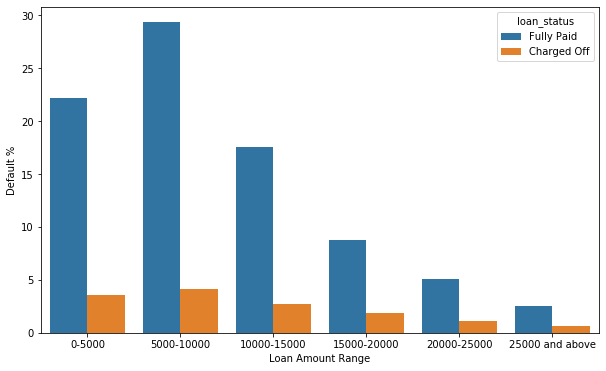

In [61]:
plt.figure(figsize=[10, 6])
ax = sns.barplot(x='loan_amnt_range', y="isDefault", hue='loan_status', data=loans, estimator=lambda x:len(x)/len(loans)*100)
ax.set(xlabel='Loan Amount Range', ylabel='Default %')
plt.show()

In [62]:
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,isDefault,loan_amnt_range,annual_salary,rate_of_intertest,dti_range,revol_uti_rangle
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,2015-01-01,171.62,2016-05-01,0.0,0,0-5000,0-50000,10-12.5,25-30,80-90
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,2013-04-01,119.66,2013-09-01,0.0,1,0-5000,0-50000,15-17.5,0-5,0-10
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,2014-06-01,649.91,2016-05-01,0.0,0,0-5000,0-50000,15-17.5,5-10,90-100
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,2015-01-01,357.48,2016-04-01,0.0,0,5000-10000,0-50000,12.5-15,15-20,20-30
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,...,2015-01-01,161.03,2016-01-01,0.0,0,0-5000,0-50000,7.5-10,10-15,20-30


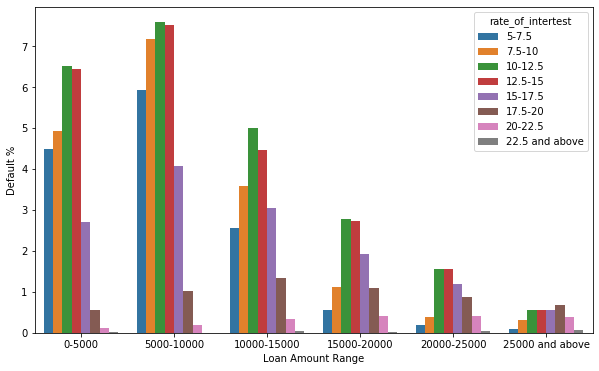

In [63]:
plt.figure(figsize=[10, 6])
ax = sns.barplot(x='loan_amnt_range', y="isDefault", hue='rate_of_intertest', data=loans, estimator=lambda x:len(x)/len(loans)*100)
ax.set(xlabel='Loan Amount Range', ylabel='Default %')
plt.show()

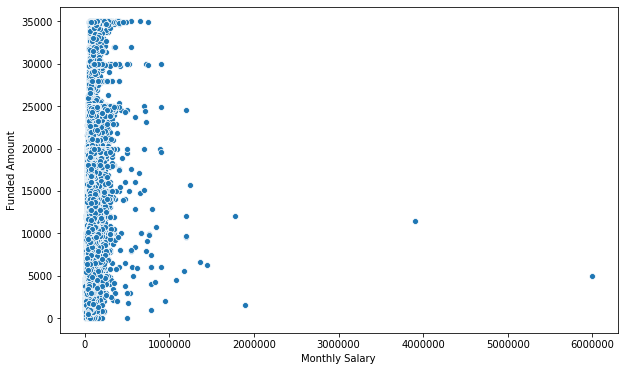

In [64]:
plt.figure(figsize=[10, 6])
ax = sns.scatterplot(x='annual_inc', y="funded_amnt_inv", data=loans)
ax.set(xlabel='Monthly Salary', ylabel='Funded Amount')
plt.show()

In [65]:
corr = loans.corr()
corr.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,isDefault
id,1.000000,0.993171,0.124165,0.136029,0.201459,0.045709,0.082557,0.009802,0.079864,-0.003886,...,0.111027,0.166581,0.094046,0.120837,-0.047511,0.042666,-0.007803,0.141396,-0.010711,0.048107
member_id,0.993171,1.000000,0.124884,0.136095,0.210249,0.041777,0.078179,0.010980,0.080836,-0.002982,...,0.113201,0.176162,0.095604,0.124856,-0.050033,0.040667,-0.009716,0.142120,-0.010472,0.045760
loan_amnt,0.124165,0.124884,1.000000,0.981540,0.952121,0.300244,0.931079,0.269951,0.060291,-0.034503,...,0.883308,0.859612,0.847264,0.728171,0.048131,0.143268,0.077199,0.475530,-0.031498,0.062947
funded_amnt,0.136029,0.136095,0.981540,1.000000,0.971613,0.304318,0.957249,0.265974,0.060433,-0.034569,...,0.900599,0.877703,0.866025,0.736756,0.050387,0.143744,0.078830,0.479666,-0.032453,0.059595
funded_amnt_inv,0.201459,0.210249,0.952121,0.971613,1.000000,0.295000,0.923826,0.256985,0.063451,-0.038505,...,0.886428,0.908127,0.851007,0.731110,0.036470,0.135103,0.068101,0.470964,-0.037436,0.046010


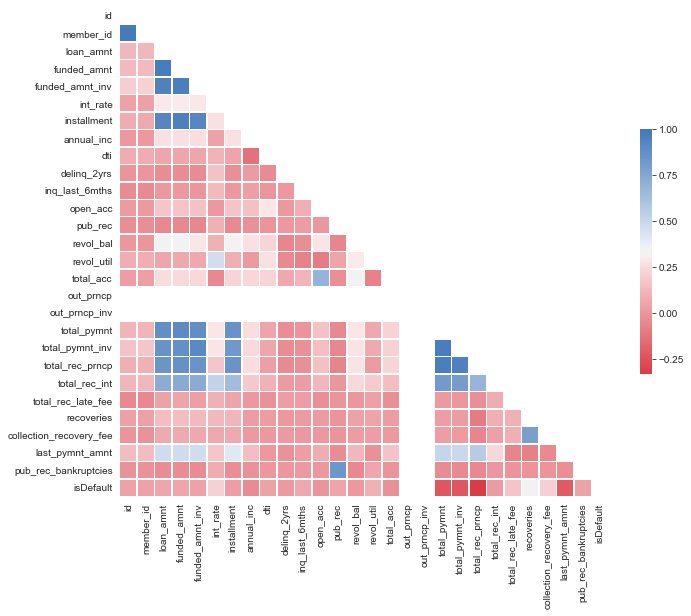

In [66]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set_style(style = 'white')
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(10, 250, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

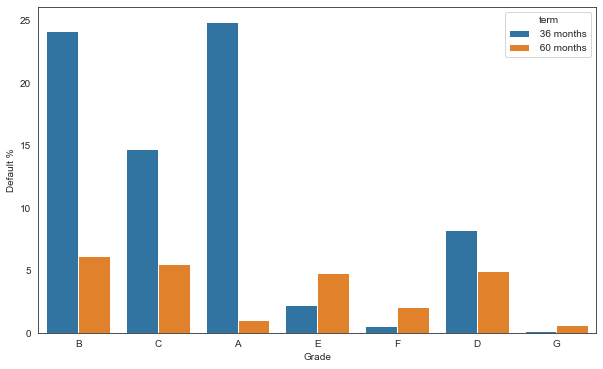

In [67]:
plt.figure(figsize=[10, 6])
ax = sns.barplot(x='grade', y="isDefault", hue='term', data=loans, estimator=lambda x:len(x)/len(loans)*100)
ax.set(xlabel='Grade', ylabel='Default %')
plt.show()

In [68]:
loans['issue_d_month'] = loans['issue_d'].dt.month
loans['issue_d_year'] = loans['issue_d'].dt.year

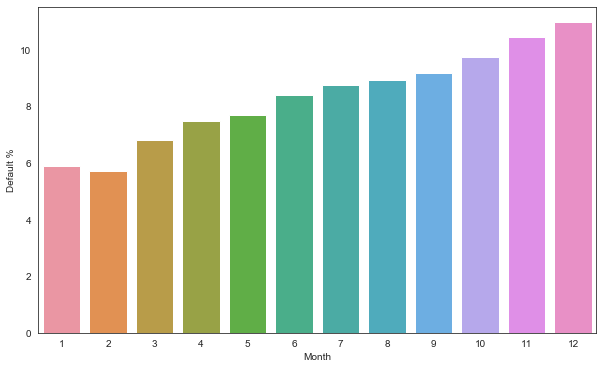

In [69]:
plt.figure(figsize=[10, 6])
ax = sns.barplot(x='issue_d_month', y="isDefault", data=loans, estimator=lambda x:len(x)/len(loans)*100, order=sorted(loans['issue_d_month'].unique()))
ax.set(xlabel='Month', ylabel='Default %')
plt.show()

It is observed the percentage of defaulters increases monthwise

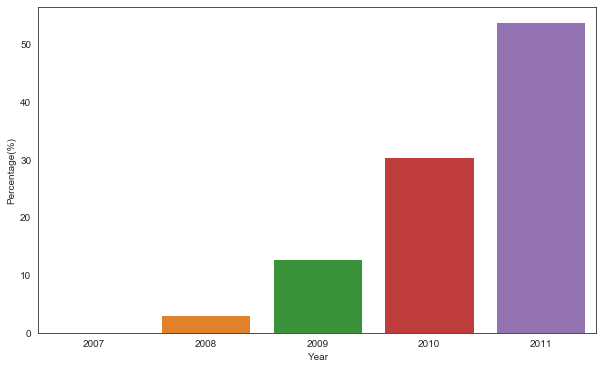

In [90]:
plt.figure(figsize=[10, 6])
ax = sns.barplot(x='issue_d_year', y="isDefault", data=loans, estimator=lambda x:len(x)/len(loans)*100, order=sorted(loans['issue_d_year'].unique()))
ax.set(xlabel='Year', ylabel='Percentage(%)')
plt.show()

From the given records, it can be observed that more than 50% defaulters were observed in 2011

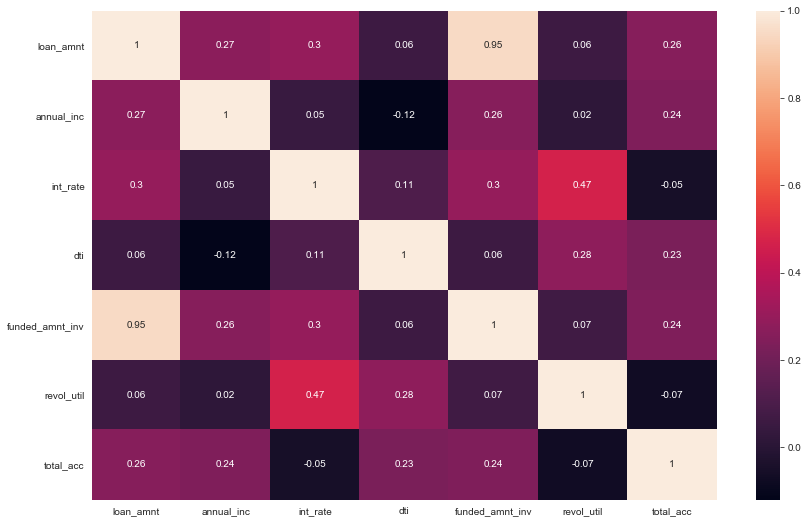

In [91]:
# checking correlation of important variables.
cor_loan=loans[['loan_amnt','annual_inc', 'int_rate', 'dti', 'funded_amnt_inv','revol_util', 'total_acc']]
f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(round(cor_loan.corr(),2), 
            xticklabels=cor_loan.columns.values,
            yticklabels=cor_loan.columns.values,annot= True)
plt.show()